In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

%matplotlib inline

In [21]:
df = pd.read_csv("/data/iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

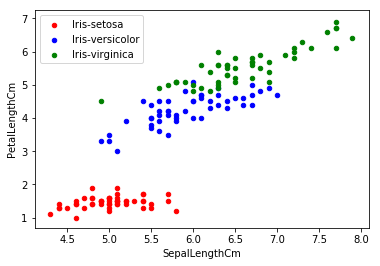

In [16]:
fig, ax = plt.subplots()
colors = ["red", "blue", "green"]
for i, v in enumerate(df.Species.unique()):
    #print(i, v)
    df1 = df[df.Species == v][features]
    df1.plot.scatter(0, 1, ax = ax, color = colors[i], label = v)

Accurcy: 1.000000,
precision: 1.000000,
recall: 1.000000


Text(0,0.5,'PetalLengthCm')

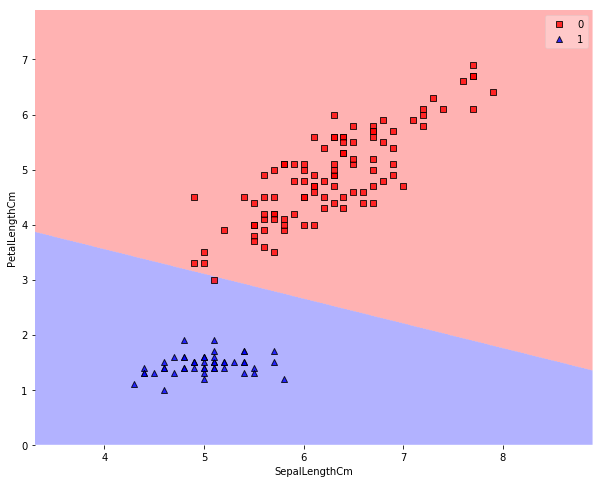

In [31]:
X = df[features]
y = np.where(df.Species == "Iris-setosa", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0
                    , max_iter=2000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.933333,
precision: 1.000000,
recall: 0.823529


Text(0,0.5,'PetalLengthCm')

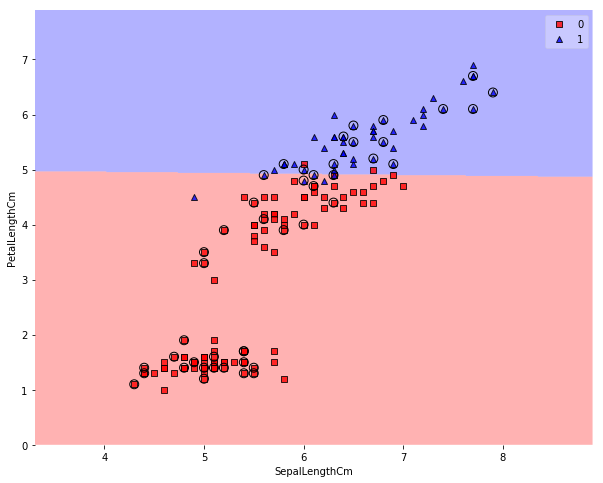

In [33]:
X = df[features]
y = np.where(df.Species == "Iris-virginica", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0
                    , max_iter=2000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.911111,
precision: 0.714286,
recall: 1.000000


Text(0,0.5,'PetalLengthCm')

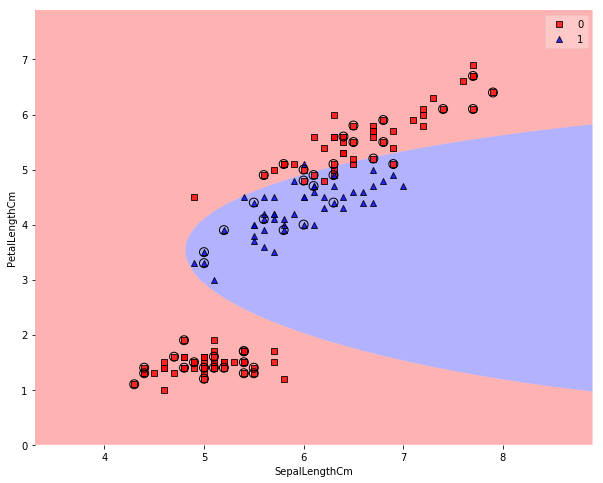

In [66]:
X = df[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(C=1.0
                    , max_iter=2000))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.888889,
precision: 0.692308,
recall: 0.900000


Text(0,0.5,'PetalLengthCm')

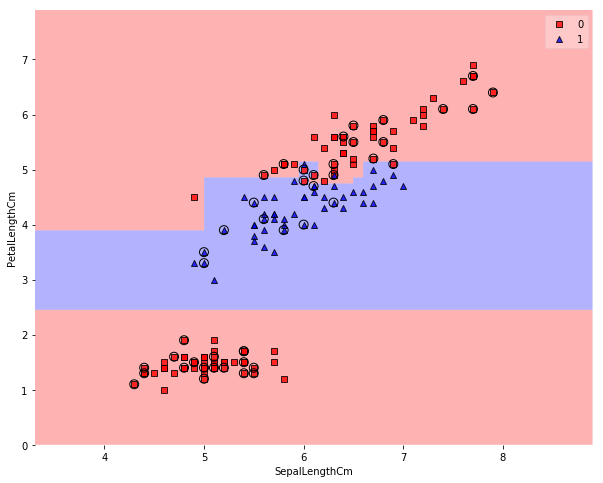

In [37]:
X = df[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("lr", tree.DecisionTreeClassifier(max_depth=6))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.911111,
precision: 0.750000,
recall: 0.900000


Text(0,0.5,'PetalLengthCm')

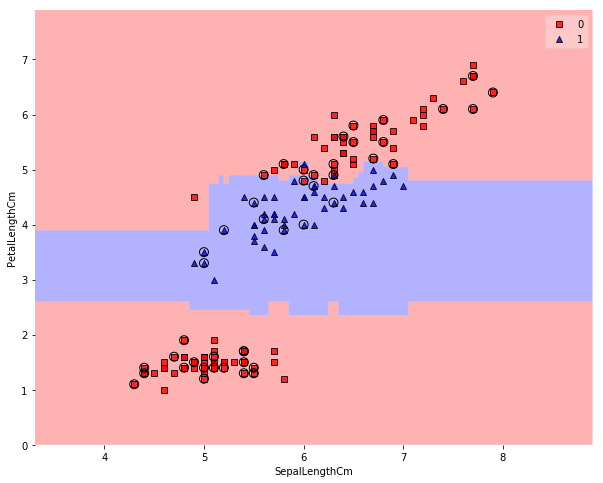

In [39]:
X = df[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("lr", ensemble.RandomForestClassifier(max_depth=6))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.888889,
precision: 0.692308,
recall: 0.900000


Text(0,0.5,'PetalLengthCm')

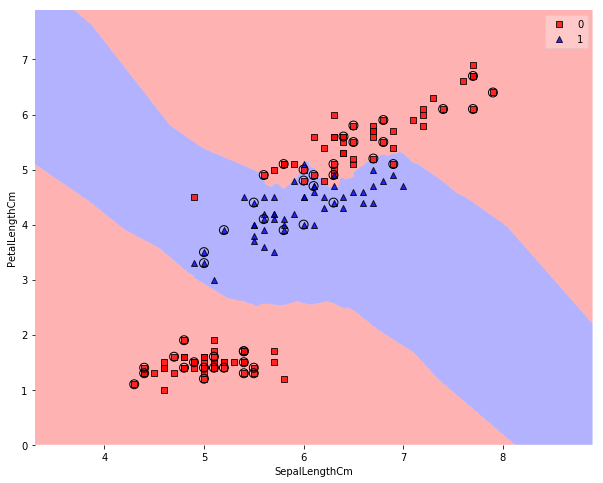

In [65]:
X = df[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", neighbors.KNeighborsClassifier(n_neighbors=5))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.933333,
precision: 0.769231,
recall: 1.000000


Text(0,0.5,'PetalLengthCm')

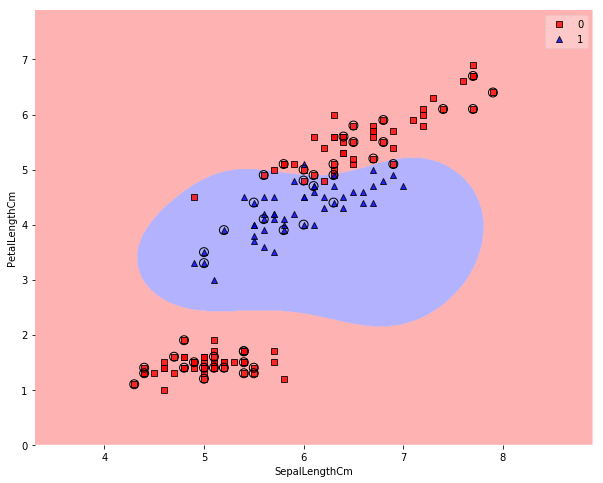

In [64]:
X = df[features]
y = np.where(df.Species == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", svm.SVC(C=1.0, gamma=1))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f,\nprecision: %f,\nrecall: %f" 
      % (accuracy,
         metrics.precision_score(y_test, y_test_pred),
         metrics.recall_score(y_test, y_test_pred)))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

# Multi-class classification problem

Accurcy: 0.911111


Text(0,0.5,'PetalLengthCm')

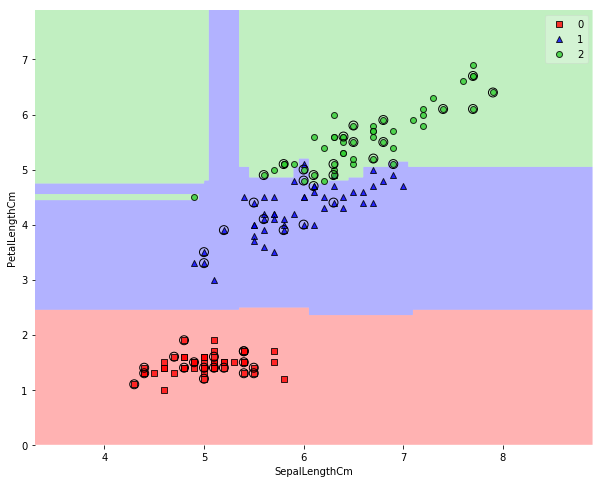

In [59]:
label_encoder = preprocessing.LabelEncoder()
X = df[features]
y = label_encoder.fit_transform(df.Species)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("lr", ensemble.RandomForestClassifier(max_depth=6, random_state=1))
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f" 
      % (accuracy,
         #metrics.precision_score(y_test, y_test_pred),
         #metrics.recall_score(y_test, y_test_pred)
        ))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.888889


Text(0,0.5,'PetalLengthCm')

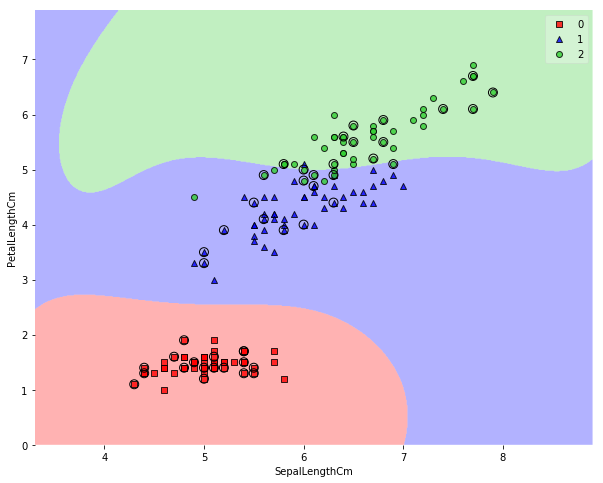

In [63]:
label_encoder = preprocessing.LabelEncoder()
X = df[features]
y = label_encoder.fit_transform(df.Species)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=3
    #                                , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", svm.SVC())
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f" 
      % (accuracy,
         #metrics.precision_score(y_test, y_test_pred),
         #metrics.recall_score(y_test, y_test_pred)
        ))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accurcy: 0.955556


Text(0,0.5,'PetalLengthCm')

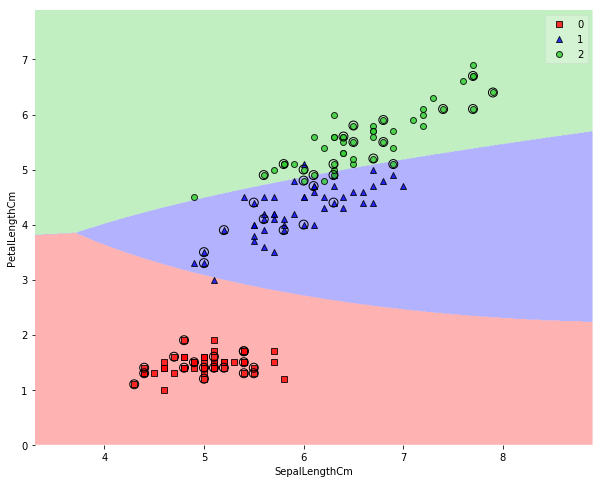

In [67]:
label_encoder = preprocessing.LabelEncoder()
X = df[features]
y = label_encoder.fit_transform(df.Species)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 123)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression())
])

#est = linear_model.LinearRegression()
est.fit(X_train, y_train)


y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accurcy: %f" 
      % (accuracy,
         #metrics.precision_score(y_test, y_test_pred),
         #metrics.recall_score(y_test, y_test_pred)
        ))

plt.figure(figsize = (10, 8))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

In [70]:
est.steps[-1][-1].coef_.shape

(3, 9)